<div align='center'>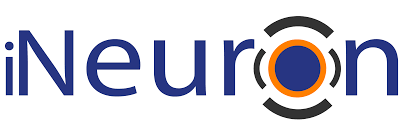</div>


# **Forecasting Climate Change - Modeling**

**Problem Statement:** Select, train and Validate a best Time Series Model to forecast Average Temperatures per month for next years.
<br>

This notebook contains, 
1) Import All Required Libraries<br>
2) Load and Show Dataset <br>
3) Missing Values Imputation<br>
4) Data Stationarity Check <br>
5) Time Series Modeling : Neural Prophet <br>
7) Preparing dataset for NeuralProphet Training<br>
8) Spliting Dataset for training and validation<br>
9) Model Training <br>
10) Model Training History and Visualization<br>
11) Model performence analysis on Validation Data <br>
12) Demo forecasting for next 2 years 

**Data :** Here for the training the model, I have used a dataset contains Global Land Average Temperature Per Month from 1750 to 2015.

<div align='center'><img src='https://climate.nasa.gov/system/news_items/main_images/2293_climateprojection_768_80.jpg'></div>

<br>

### **Import All Required Libraries**

In [1]:
# Import Basic Libraries, Pandas, NumPy and Plotly Express
import pandas as pd
import numpy as np
import plotly.express as px
import datetime
from statsmodels.tsa.stattools import adfuller
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error, r2_score

### **Load and Initialize Data**

In [2]:
# Read the csv file and load it as Pandas DataFrame 
print('Loading Dataset.........')
df = pd.read_csv('datasets/GlobalTemperatures.csv',parse_dates=['dt'],index_col='dt')
df = df[['LandAverageTemperature']]
df.columns = ['AverageTemperature']
print('Dataset Loaded Successfully.')
df

Loading Dataset.........
Dataset Loaded Successfully.


,AverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


<br>

 ### Missing Values Imputation :

<strong> Strategy :</strong> Impute missing Values with Seasonal (Monthly) mean

In [3]:
print('Number of Missing Values before imputation :',int(df.isnull().sum()))
# I impute missing Values with Seasonal (Monthly) mean
print('Imputing missing Values.......................')
monthly_mean = df['AverageTemperature'].groupby(df.index.month).mean().to_dict()
df['monthly_mean'] = df.index.month.map(monthly_mean)
df['AverageTemperature'].fillna(df['monthly_mean'],inplace=True)
df = df[['AverageTemperature']]
print('Number of Missing Values after imputation :',int(df.isnull().sum()))

Number of Missing Values before imputation : 12
Imputing missing Values.......................
Number of Missing Values after imputation : 0


<br>

### Data Stationarity Check

<strong> Strategy :</strong> Augmented Dickey Fuller test (ADF Test)

In [4]:
res = adfuller(df['AverageTemperature'])
print('P Value :',round(res[1],5))
if res[1] > 0.05 :
    print('Non Stationary')
else :
    print('Stationary')

P Value : 0.00447
Stationary


As per the ADF test, dataset is already stationary and it is ready fit a Time Series Model.

# Time Series Modeling : Neural Prophet 

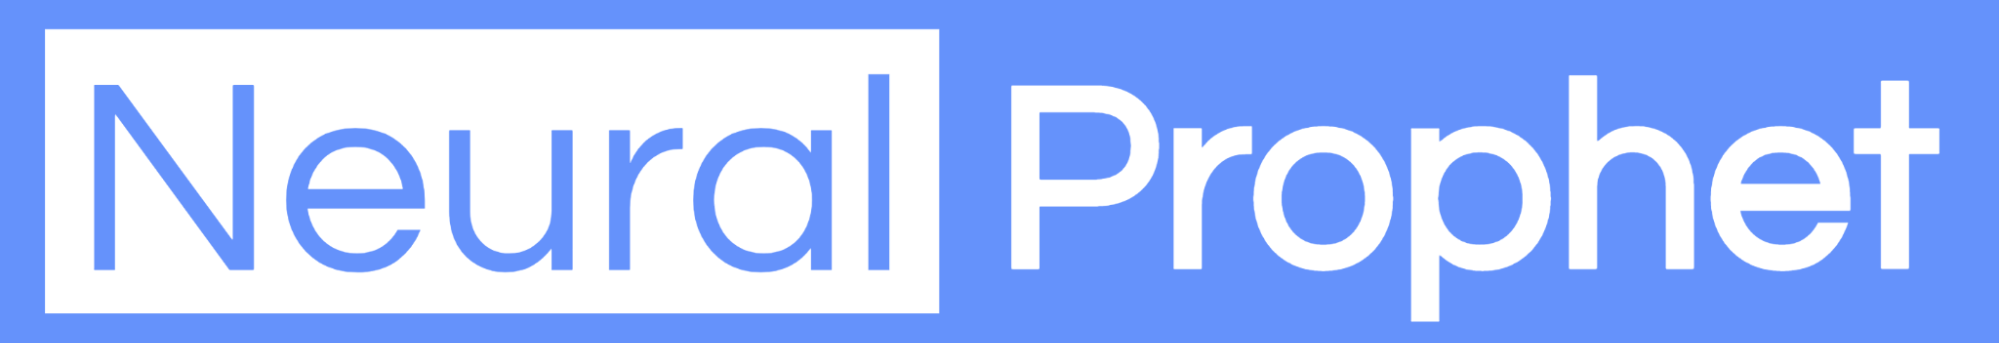

**What is Neural Prophet ?**

> NeuralProphet is an upgraded version of Prophet that is built using PyTorch and uses deep learning models such as AR-Net for time-series forecasting. The main benefit of using NeuralProphet is that it features a simple API inspired by Prophet, but gives you access to more sophisticated deep learning models for time-series forecasting. 

### Preparing dataset for NeuralProphet Training

In [5]:
data = df['AverageTemperature'].reset_index()
data.columns = ['ds','y']
data

,ds,y
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


### Spliting Dataset  , First 80% for Training and Next 20% for Validation

In [6]:
indx = round(data.shape[0] * 0.8)
train_df = data.iloc[:indx].copy()
val_df = data.iloc[indx:].copy()

### Model Training

In [7]:
prophet = NeuralProphet()
training = prophet.fit(train_df,freq='1m',validation_df=val_df,epochs=10)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/270 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.93E-02, min: 1.97E+00


  0%|          | 0/270 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.66E-02, min: 1.69E+00


  0%|          | 0/270 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.79E-02, min: 1.69E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.79E-02
Epoch[10/10]: 100%|█| 10/10 [00:01<00:00,  5.19it/s, SmoothL1Loss=0.00154, MAE=0.611, RMSE=0.886, RegLoss=0, MAE_val=0.


### Model Training History Loss per Epochs

In [8]:
training

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.243417,9.952705,11.510638,0.0,0.122826,6.907525,8.113840
1,0.036990,3.263893,3.929469,0.0,0.008579,1.829546,2.144330
2,0.002802,0.946165,1.204545,0.0,0.001142,0.618434,0.782210
3,0.001916,0.722418,0.994137,0.0,0.000567,0.440642,0.551442
4,0.001709,0.665523,0.938006,0.0,0.000469,0.399588,0.501263
5,0.001640,0.643711,0.918347,0.0,0.000384,0.366680,0.453827
6,0.001590,0.626691,0.899825,0.0,0.000461,0.396421,0.496987
7,0.001576,0.620861,0.897994,0.0,0.000417,0.378625,0.472666
8,0.001558,0.616046,0.887899,0.0,0.000453,0.395895,0.492986
9,0.001543,0.611498,0.885949,0.0,0.000453,0.395538,0.492971


### Visualization of Model Training History

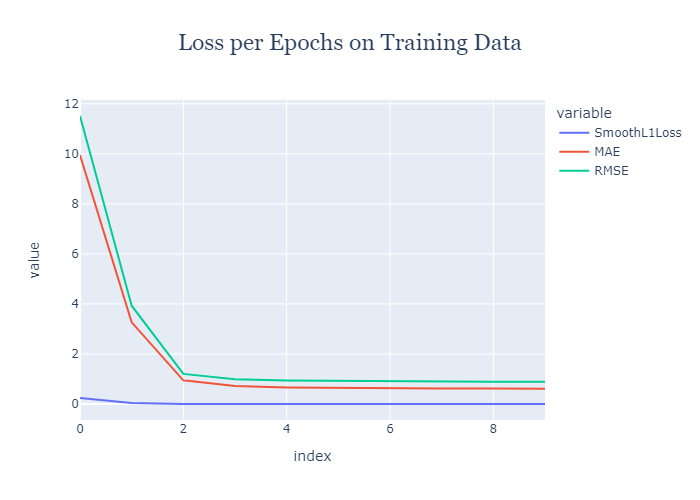

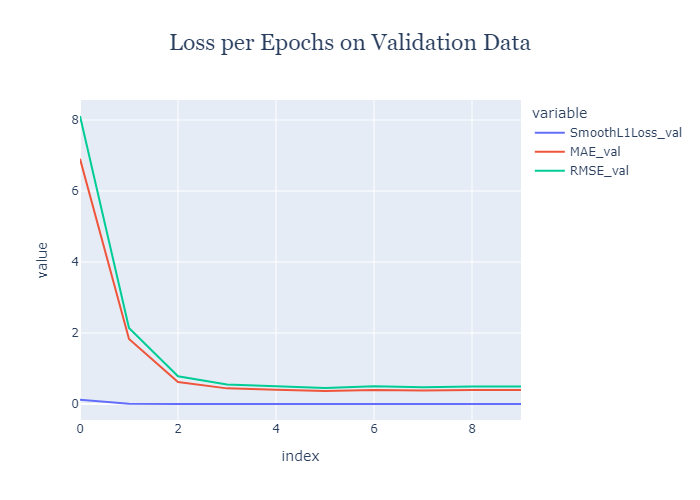

In [9]:
fig = px.line(training.iloc[:,:3],title='Loss per Epochs on Training Data')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show('png')
fig = px.line(training.iloc[:,4:],title='Loss per Epochs on Validation Data')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show('png')

### Model Performance Analysis

> Testing model on validation data

#### Generate forecast as per dates of Validation dataset

In [10]:
val_df1 = val_df.copy()
val_df1['y'] = np.nan
val_pred = prophet.predict(val_df1)
val_pred['y'] = val_df['y'].values
val_pred

,ds,y,yhat1,residual1,trend,season_yearly
0,1962-11-01,6.283,6.207423,NaN,8.777220,-2.569797
1,1962-12-01,3.940,3.589861,NaN,8.777712,-5.187850
2,1963-01-01,2.901,2.553312,NaN,8.778220,-6.224908
3,1963-02-01,4.020,3.313645,NaN,8.778728,-5.465083
4,1963-03-01,5.097,5.185464,NaN,8.779188,-3.593724
...,...,...,...,...,...,...
633,2015-08-01,14.755,14.595591,NaN,9.093105,5.502485
634,2015-09-01,12.999,12.480521,NaN,9.093614,3.386908
635,2015-10-01,10.801,9.656142,NaN,9.094106,0.562037
636,2015-11-01,7.433,6.545505,NaN,9.094614,-2.549109


#### Visualization forecasted Data on top of Real Observed Validation data

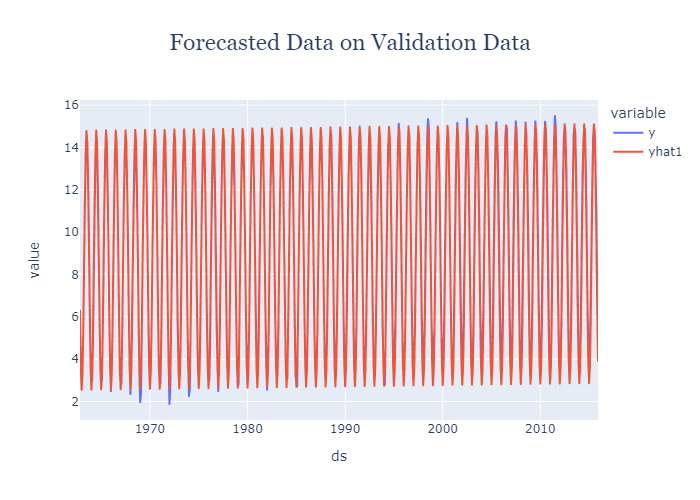

In [11]:
fig = px.line(val_pred.set_index('ds')[['y','yhat1']],title='Forecasted Data on Validation Data')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show('png')

#### RMSE Error and R2 Score :

In [12]:
rmse = mean_squared_error(val_pred['y'],val_pred['yhat1']) ** 0.5
r2 = r2_score(val_pred['y'],val_pred['yhat1'])
print('RMSE :',round(rmse,4))
print('R2 Score :',round(r2,4))

RMSE : 0.493
R2 Score : 0.9859


As per the RMSE and R2 Score, the model trained perfectly and enough good for deployment.

### Forcasting for Next 2 Years

In [13]:
today = str(datetime.datetime.today()).split()[0]
dates = pd.date_range(today, periods=12*2, freq='1m')
dates_df = pd.DataFrame({'ds':dates})
dates_df['y'] = np.nan
dates_pred = prophet.predict(dates_df)
dates_pred

,ds,y,yhat1,residual1,trend,season_yearly
0,2021-12-31,NaN,2.894608,NaN,9.131537,-6.236929
1,2022-01-31,NaN,3.644936,NaN,9.132046,-5.487110
2,2022-02-28,NaN,5.459717,NaN,9.132505,-3.672788
3,2022-03-31,NaN,8.788422,NaN,9.133014,-0.344592
4,2022-04-30,NaN,11.686534,NaN,9.133505,2.553028
5,2022-05-31,NaN,14.030035,NaN,9.134014,4.896021
6,2022-06-30,NaN,15.110132,NaN,9.134505,5.975626
7,2022-07-31,NaN,14.682545,NaN,9.135014,5.547530
8,2022-08-31,NaN,12.574901,NaN,9.135522,3.439378
9,2022-09-30,NaN,9.784409,NaN,9.136014,0.648395


#### Visualizaion of Forecasted Data

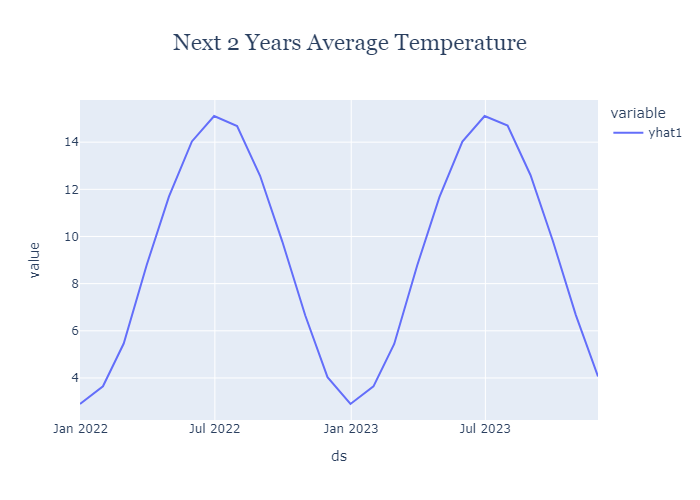

In [14]:
fig = px.line(dates_pred.set_index('ds')[['yhat1']],title='Next 2 Years Average Temperature')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show('png')

<br><br><br>

# **Thank You**

<br><br><br>